<a href="https://colab.research.google.com/github/VictorLuna02012003/Redes_Neuronales/blob/main/02_RedNeuronal_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias
import tensorflow as tf
import tensorflow_datasets as tfds #Accedemos a los sets de datos

In [2]:
#Descarga el set de datos
datos, metadatos = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
#Nombre set, descargar + info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF6NS2T/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF6NS2T/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmp5_cr9qr_tfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [4]:
#Obtener datos de entrenamiento y de pruebas por separado
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [5]:
#Obtenemos los datos de salida / categorias
nombres_clases = metadatos.features['label'].names

In [6]:
#Nombres de los datos de salida
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
#Normalizar datos
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

#Normalizar los datos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar los datos a cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

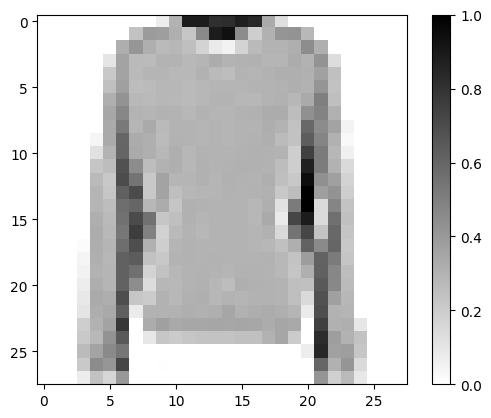

In [8]:
#Mostrar una imagen de los datos de prueba
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt
#Graficar la imagen
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

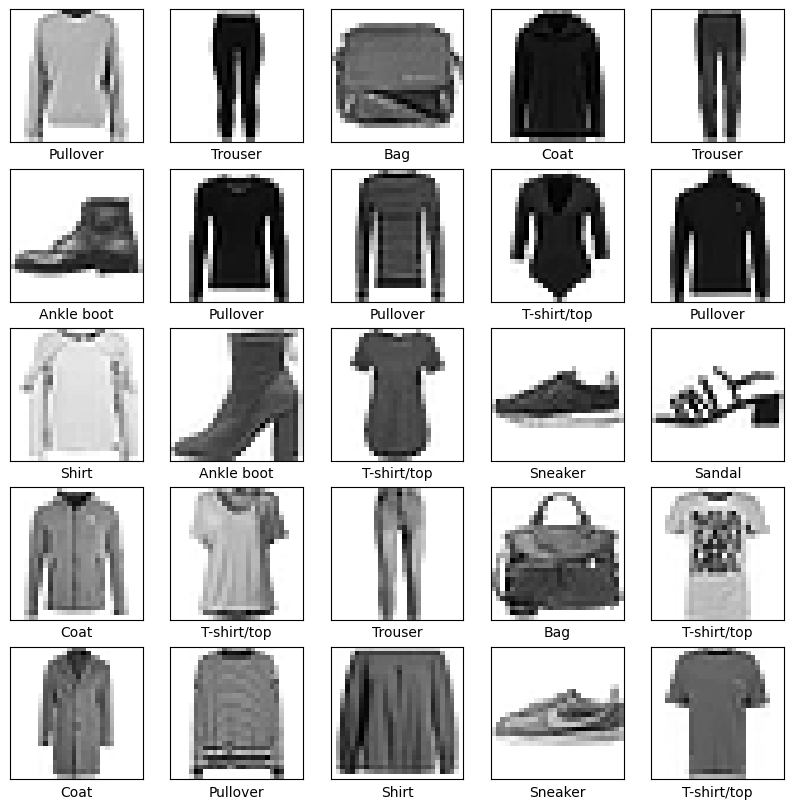

In [9]:
#Dibujar más imagenes junto a su categoria
plt.figure(figsize =(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

In [10]:
#Crear el modelo de red neuronal

modelo = tf.keras.Sequential([
    #Definimos capa de entrada, y le decimos que nuestros datos de entrada estan
    #En forma de 28x28 y en 1 canal(negro y blancos)
    tf.keras.layers.Flatten(input_shape=(28,28,1)),

    #Agregar dos capas ocultas con 50 neuronas cada una, y todas con la función RELU
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),

    #Capa de salida con 10 neuronas (categorias)
    #Cuando trabajamos con redes de clasificación, agregamos la función SOFTMAX a la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #toma el resultado más cercana
    ])

In [11]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [12]:
#Separar en variables la cantidad de ejemplospara entrenamiento y pruebas
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [13]:
#Verificar la asignacion
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [14]:
#Separamos por lotes para optimizar el entrenamiento
TAMANO_LOTE = 32

datos_entrenamiento=datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [15]:
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5168 - accuracy: 0.8160
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3866 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3580 - accuracy: 0.8684
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3272 - accuracy: 0.8794
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8838


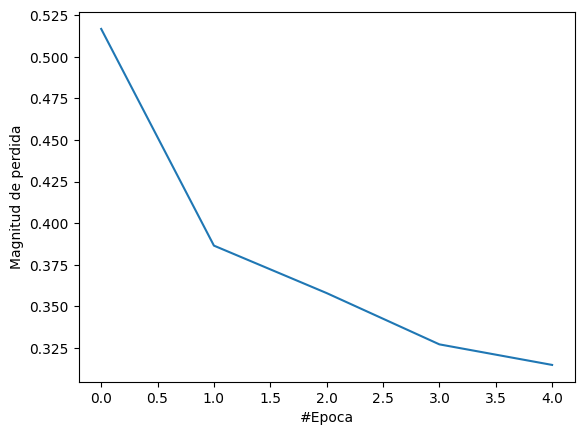

In [16]:
#Graficar la perdida
plt.xlabel("#Epoca")
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history["loss"])

1/1 [==============================] - 0s 110ms/step


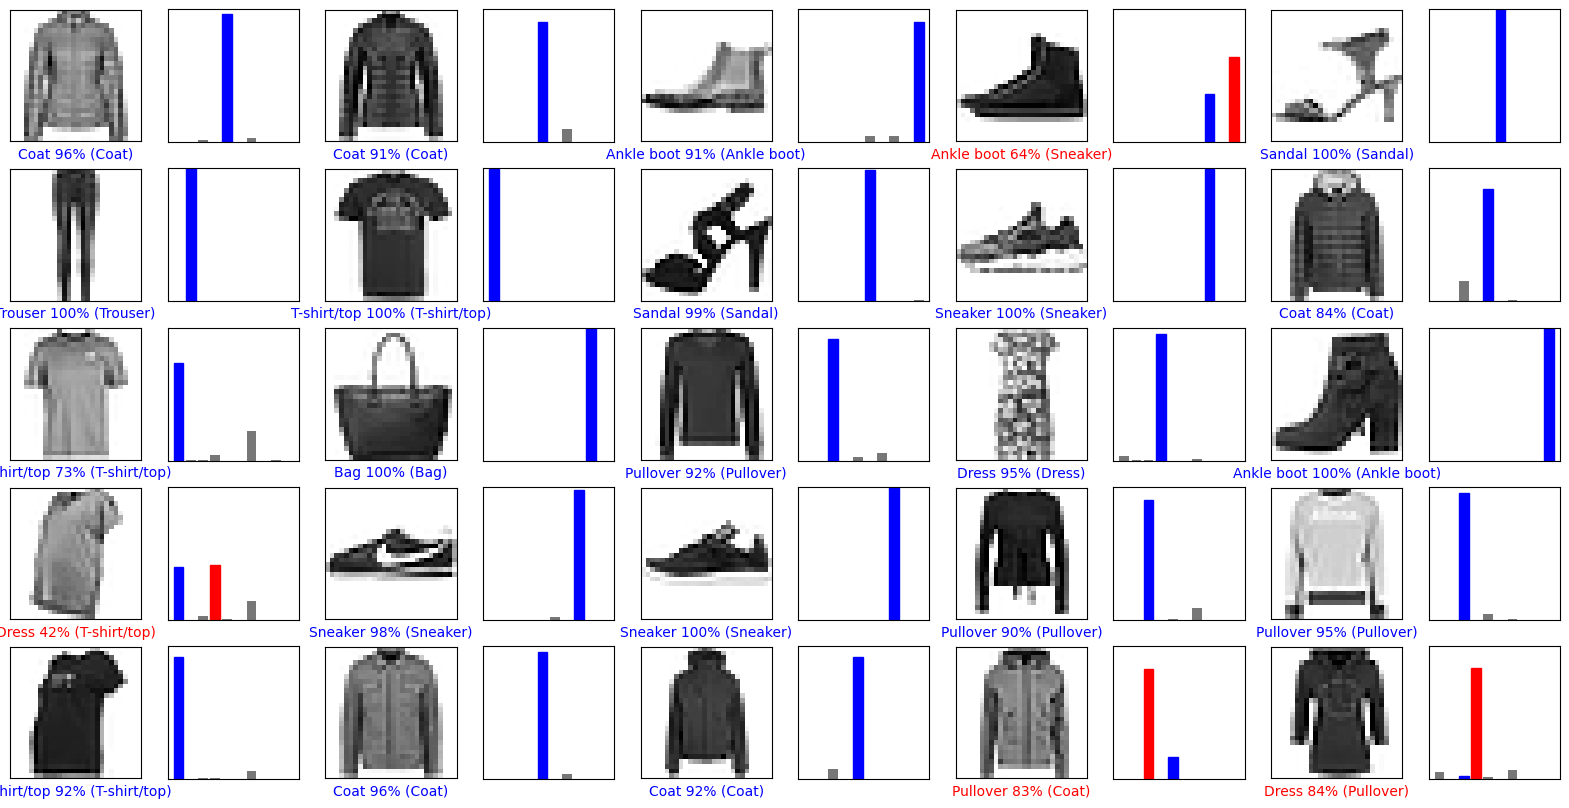

In [17]:
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)